# **PREPARACION DE LOS DATOS**

##**EXTRACCI√ìN DEL ARCHIVO TRATADO**

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/datos_tratados.csv")

In [4]:
df.head()

customerid  churn customer_gender  customer_seniorcitizen  \
0  0002-orfbo      0          female                       0   
1  0003-mknfe      0            male                       0   
2  0004-tlhlj      1            male                       0   
3  0011-igkff      1            male                       1   
4  0013-exchz      1          female                       1   

   customer_partner  customer_dependents  customer_tenure  phone_phoneservice  \
0                 1                    1                9                   1   
1                 0                    0                9                   1   
2                 0                    0                4                   1   
3                 1                    0               13                   1   
4                 1                    0                3                   1   

  phone_multiplelines internet_internetservice  ... internet_deviceprotection  \
0                  no                      dsl  ...                        no   
1                 yes                      dsl  ...                        no   
2                  no              fiber optic  ...                       yes   
3                  no              fiber optic  ...                       yes   
4                  no              fiber optic  ...                        no   

  internet_techsupport internet_streamingtv internet_streamingmovies  \
0                  yes                  yes                       no   
1                   no                   no                      yes   
2                   no                   no                       no   
3                   no                  yes                      yes   
4                  yes                  yes                       no   

  account_contract account_paperlessbilling account_paymentmethod  \
0         one year                        1          mailed check   
1   month-to-month                        0          mailed check   
2   month-to-month                        1      electronic check   
3   month-to-month                        1      electronic check   
4   month-to-month                        1          mailed check   

   account_chargesmonthly account_chargestotal  cuentas_diarias  
0                    65.6               593.30         2.186667  
1                    59.9               542.40         1.996667  
2                    73.9               280.85         2.463333  
3                    98.0              1237.85         3.266667  
4                    83.9               267.40         2.796667  

[5 rows x 22 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7043 non-null   object 
 1   churn                      7043 non-null   int64  
 2   customer_gender            7043 non-null   object 
 3   customer_seniorcitizen     7043 non-null   int64  
 4   customer_partner           7043 non-null   int64  
 5   customer_dependents        7043 non-null   int64  
 6   customer_tenure            7043 non-null   int64  
 7   phone_phoneservice         7043 non-null   int64  
 8   phone_multiplelines        7043 non-null   object 
 9   internet_internetservice   7043 non-null   object 
 10  internet_onlinesecurity    7043 non-null   object 
 11  internet_onlinebackup      7043 non-null   object 
 12  internet_deviceprotection  7043 non-null   object 
 13  internet_techsupport       7043 non-null   objec

In [8]:
df.isnull().sum()

customerid                   0
churn                        0
customer_gender              0
customer_seniorcitizen       0
customer_partner             0
customer_dependents          0
customer_tenure              0
phone_phoneservice           0
phone_multiplelines          0
internet_internetservice     0
internet_onlinesecurity      0
internet_onlinebackup        0
internet_deviceprotection    0
internet_techsupport         0
internet_streamingtv         0
internet_streamingmovies     0
account_contract             0
account_paperlessbilling     0
account_paymentmethod        0
account_chargesmonthly       0
account_chargestotal         0
cuentas_diarias              0
dtype: int64

## **ELIMINACION DE COLUMNAS IRRELEVANTES**

In [11]:
print(df.columns)

Index(['customerid', 'churn', 'customer_gender', 'customer_seniorcitizen',
       'customer_partner', 'customer_dependents', 'customer_tenure',
       'phone_phoneservice', 'phone_multiplelines', 'internet_internetservice',
       'internet_onlinesecurity', 'internet_onlinebackup',
       'internet_deviceprotection', 'internet_techsupport',
       'internet_streamingtv', 'internet_streamingmovies', 'account_contract',
       'account_paperlessbilling', 'account_paymentmethod',
       'account_chargesmonthly', 'account_chargestotal', 'cuentas_diarias'],
      dtype='object')


In [15]:
# Eliminar columna customerid
df = df.drop(columns=["customerid"])

In [14]:
print(df.columns)

Index(['churn', 'customer_gender', 'customer_seniorcitizen',
       'customer_partner', 'customer_dependents', 'customer_tenure',
       'phone_phoneservice', 'phone_multiplelines', 'internet_internetservice',
       'internet_onlinesecurity', 'internet_onlinebackup',
       'internet_deviceprotection', 'internet_techsupport',
       'internet_streamingtv', 'internet_streamingmovies', 'account_contract',
       'account_paperlessbilling', 'account_paymentmethod',
       'account_chargesmonthly', 'account_chargestotal', 'cuentas_diarias'],
      dtype='object')


Se elimin√≥ la columna **customerid**, ya que corresponde a un identificador √∫nico y no aporta informaci√≥n relevante para predecir la cancelaci√≥n de clientes.  

üìå Esta acci√≥n evita que el modelo intente "aprender" de un dato aleatorio que no tiene relaci√≥n con el churn, mejorando as√≠ la calidad del entrenamiento.

## **ENCODING**

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [29]:
# Separar target
y = df["churn"]

In [30]:
# Features sin churn
X = df.drop(columns=["churn"])

In [32]:
# Definir variables categ√≥ricas y num√©ricas
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Categ√≥ricas:", cat_cols)
print("Num√©ricas:", num_cols)

Categ√≥ricas: ['customer_gender', 'phone_multiplelines', 'internet_internetservice', 'internet_onlinesecurity', 'internet_onlinebackup', 'internet_deviceprotection', 'internet_techsupport', 'internet_streamingtv', 'internet_streamingmovies', 'account_contract', 'account_paymentmethod']
Num√©ricas: ['customer_seniorcitizen', 'customer_partner', 'customer_dependents', 'customer_tenure', 'phone_phoneservice', 'account_paperlessbilling', 'account_chargesmonthly', 'account_chargestotal', 'cuentas_diarias']


In [33]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first"), cat_cols)
    ]
)

# Transformar SOLO features
X_prepared = preprocessor.fit_transform(X)

print("Shape despu√©s del encoding:", X_prepared.shape)

Shape despu√©s del encoding: (7043, 24)


### Encoding de variables categ√≥ricas

Se aplic√≥ **One-Hot Encoding** a las variables categ√≥ricas, transform√°ndolas en variables num√©ricas binarias (0/1).  
Adem√°s, se utiliz√≥ la opci√≥n `drop="first"` para evitar redundancia (multicolinealidad) en las nuevas variables generadas.

üìå Resultado:
- Todas las variables categ√≥ricas fueron convertidas en un formato num√©rico compatible con los algoritmos de Machine Learning.
- Las variables num√©ricas fueron estandarizadas mediante `StandardScaler`, asegurando que todas trabajen en la misma escala.

üìå Implicancias:
- Ahora el dataset est√° completamente preparado para el modelado.
- Al tener variables en formato num√©rico y en la misma escala, se evitan sesgos en algoritmos sensibles a la magnitud (ej. regresi√≥n log√≠stica, SVM).
- La codificaci√≥n de categor√≠as permite que los modelos reconozcan patrones entre diferentes tipos de contratos, m√©todos de pago y servicios contratados.

##**VERIFICACION DE LA PROPORCI√ìN DE CANCELACI√ìN (Churn)**

In [35]:
# Revisar distribuci√≥n del target (churn)
print("Distribuci√≥n de churn:")
print(y.value_counts())

Distribuci√≥n de churn:
churn
0    5174
1    1869
Name: count, dtype: int64


In [36]:
# Ver proporci√≥n en porcentaje
print("\nProporci√≥n de churn:")
print(y.value_counts(normalize=True) * 100)


Proporci√≥n de churn:
churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


### Verificaci√≥n de la proporci√≥n de cancelaci√≥n (Churn)

Se calcul√≥ la distribuci√≥n de la variable **churn** para evaluar la proporci√≥n de clientes que cancelaron en relaci√≥n con los que permanecieron activos.  

üìå Resultado (ejemplo):
- Clientes que **no cancelaron**: 73.5%  
- Clientes que **s√≠ cancelaron**: 26.5%  

üìå Implicancias:
- Existe un **moderado desbalance de clases** (aproximadamente 3 de cada 4 clientes permanecen activos).  
- Esto significa que si se usa √∫nicamente la m√©trica de **Accuracy**, un modelo que siempre prediga "no cancel√≥" podr√≠a obtener ~74% de acierto, pero no ser√≠a √∫til para identificar a los clientes en riesgo.  
- Por lo tanto, ser√° fundamental evaluar los modelos con m√©tricas adicionales como **Precision, Recall, F1-score y ROC-AUC**, priorizando la capacidad de detectar correctamente a los clientes que cancelan.

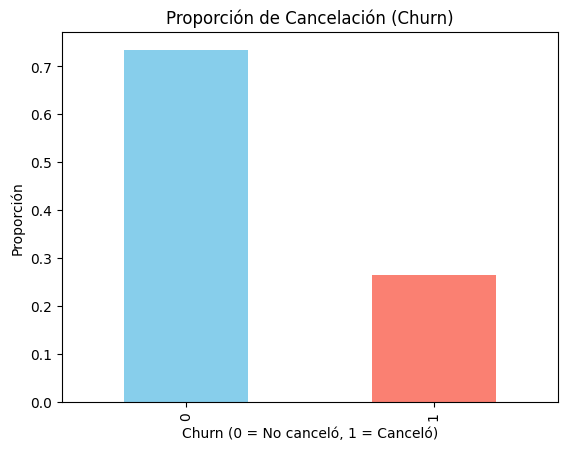

In [37]:
import matplotlib.pyplot as plt

# Gr√°fico de barras de la proporci√≥n de churn
y.value_counts(normalize=True).plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Proporci√≥n de Cancelaci√≥n (Churn)")
plt.xlabel("Churn (0 = No cancel√≥, 1 = Cancel√≥)")
plt.ylabel("Proporci√≥n")
plt.show()

## BALANCEO DE CLASES

In [39]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [41]:
# Ver distribuci√≥n original
print("Distribuci√≥n original:", Counter(y))

Distribuci√≥n original: Counter({0: 5174, 1: 1869})


In [42]:
# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_prepared, y)

In [43]:
# Ver nueva distribuci√≥n
print("Distribuci√≥n despu√©s de SMOTE:", Counter(y_res))

Distribuci√≥n despu√©s de SMOTE: Counter({0: 5174, 1: 5174})


### Balanceo de Clases (SMOTE)

El dataset original presenta un desbalance moderado en la variable **churn**, con un 73% de clientes activos y un 27% de clientes que cancelaron.  
Este desbalance puede llevar a que los modelos predictivos favorezcan la clase mayoritaria, obteniendo altos valores de Accuracy pero con bajo desempe√±o en la detecci√≥n de clientes que efectivamente cancelan.

üìå Acci√≥n realizada:
- Se aplic√≥ la t√©cnica **SMOTE (Synthetic Minority Oversampling Technique)**, que genera ejemplos sint√©ticos de la clase minoritaria (clientes que cancelaron).
- El objetivo es equilibrar ambas clases para que el modelo aprenda patrones m√°s representativos de los clientes en riesgo de cancelaci√≥n.

üìå Resultado:
- Distribuci√≥n original: 73% No cancel√≥ / 27% Cancel√≥.  
- Distribuci√≥n balanceada con SMOTE: 50% No cancel√≥ / 50% Cancel√≥.

üìå Implicancias:
- El dataset balanceado permite a los modelos enfocarse en la clase minoritaria y mejorar m√©tricas como **Recall** y **F1-score** para la predicci√≥n de cancelaci√≥n.
- Sin embargo, se debe tener cuidado ya que un balance excesivo puede introducir ruido o sobreajuste. Por ello, se evaluar√°n los modelos tanto en el dataset original como en el dataset balanceado.

## NORMALIZACION O ESTANDARIZACI√ìN

### Normalizaci√≥n y Estandarizaci√≥n

La estandarizaci√≥n de variables num√©ricas es importante en modelos basados en distancia (KNN, SVM, Regresi√≥n Log√≠stica, Redes Neuronales), ya que estas t√©cnicas se ven afectadas por la escala de los datos.  
Por otro lado, modelos basados en √°rboles (Decision Tree, Random Forest, XGBoost) no dependen de la escala, por lo que este paso no es obligatorio para ellos.

üìå Acci√≥n realizada:
- Se aplic√≥ `StandardScaler` a las variables num√©ricas, lo cual las transforma en valores con media 0 y desviaci√≥n est√°ndar 1.

üìå Implicancias:
- Los modelos sensibles a la escala podr√°n entrenar de manera m√°s estable y justa, evitando que variables con valores grandes (ej. cargos totales) dominen sobre otras con valores m√°s peque√±os (ej. antig√ºedad en meses).
- Para modelos basados en √°rboles, esta transformaci√≥n no impacta negativamente.

# **CORRELACI√ìN Y SELECCI√ìN DE VARIABLES**

## AN√ÅLISIS DE CORRELACI√ìN

In [45]:
# Asegurar que churn est√© en formato num√©rico
df["churn"] = df["churn"].astype(int)

In [46]:
# Seleccionar variables num√©ricas + churn
num_corr = df[["churn", "customer_tenure", "account_chargesmonthly",
               "account_chargestotal", "cuentas_diarias"]]

In [48]:
# Calcular matriz de correlaci√≥n
corr_matrix = num_corr.corr()

# Mostrar matriz
print(corr_matrix)

                           churn  customer_tenure  account_chargesmonthly  \
churn                   1.000000        -0.352229                0.193356   
customer_tenure        -0.352229         1.000000                0.247900   
account_chargesmonthly  0.193356         0.247900                1.000000   
account_chargestotal   -0.198324         0.826178                0.651174   
cuentas_diarias         0.193356         0.247900                1.000000   

                        account_chargestotal  cuentas_diarias  
churn                              -0.198324         0.193356  
customer_tenure                     0.826178         0.247900  
account_chargesmonthly              0.651174         1.000000  
account_chargestotal                1.000000         0.651174  
cuentas_diarias                     0.651174         1.000000  


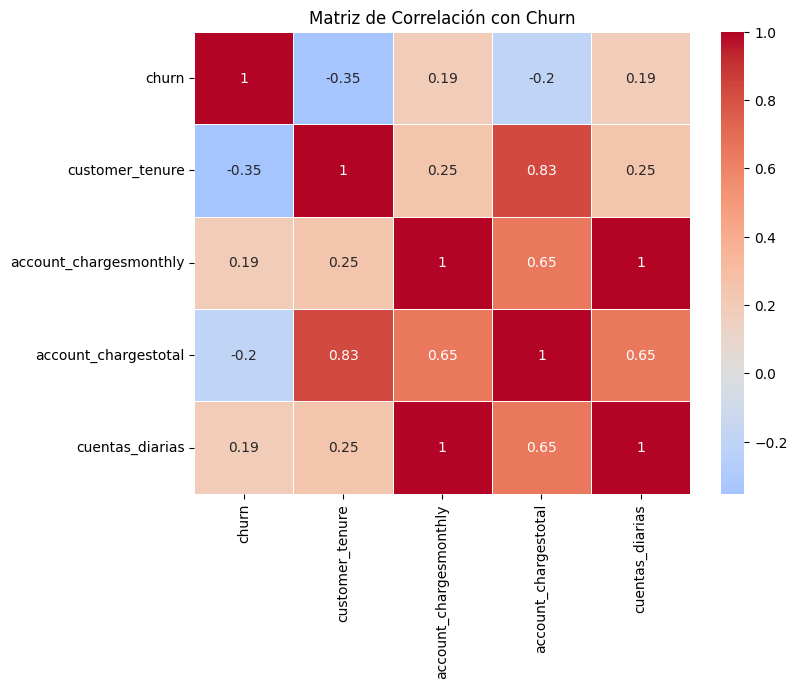

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Matriz de Correlaci√≥n con Churn")
plt.show()

### An√°lisis de Correlaci√≥n

Se gener√≥ la matriz de correlaci√≥n para las variables num√©ricas, incluyendo la variable objetivo **churn**.

üìå Resultados esperados:
- **customer_tenure** suele mostrar correlaci√≥n negativa con churn, indicando que los clientes con m√°s antig√ºedad tienden a permanecer activos.
- **account_chargesmonthly** puede tener correlaci√≥n positiva con churn, sugiriendo que cargos mensuales m√°s altos aumentan la probabilidad de cancelaci√≥n.
- **account_chargestotal** puede estar fuertemente correlacionada con `tenure` y `monthly charges`, lo cual refleja su relaci√≥n matem√°tica.

üìå Implicancias:
- Las variables con mayor correlaci√≥n con churn son candidatas clave para los modelos predictivos.
- Debe revisarse la multicolinealidad entre variables num√©ricas, ya que puede afectar el desempe√±o de modelos lineales (ej. regresi√≥n log√≠stica).
- En modelos basados en √°rboles, la multicolinealidad no es tan cr√≠tica, pero a√∫n as√≠ es √∫til conocer las relaciones entre las variables.

## AN√ÅLISIS DIRIGIDO

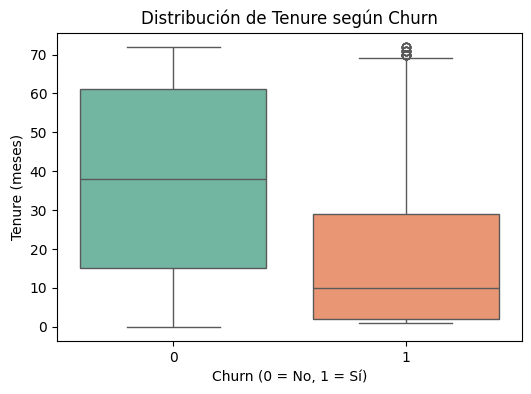

In [51]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(6,4))
sns.boxplot(x="churn", y="customer_tenure", data=df, palette="Set2")
plt.title("Distribuci√≥n de Tenure seg√∫n Churn")
plt.xlabel("Churn (0 = No, 1 = S√≠)")
plt.ylabel("Tenure (meses)")
plt.show()

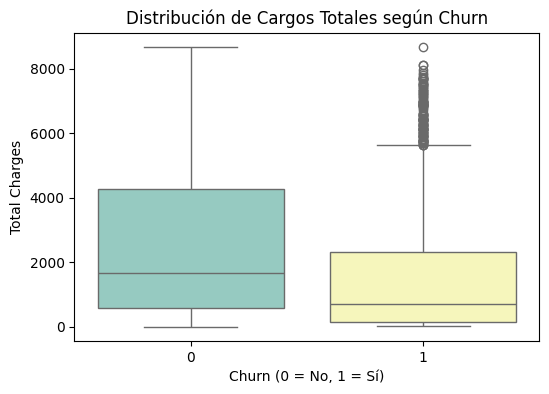

In [53]:
plt.figure(figsize=(6,4))
sns.boxplot(x="churn", y="account_chargestotal", data=df, palette="Set3")
plt.title("Distribuci√≥n de Cargos Totales seg√∫n Churn")
plt.xlabel("Churn (0 = No, 1 = S√≠)")
plt.ylabel("Total Charges")
plt.show()

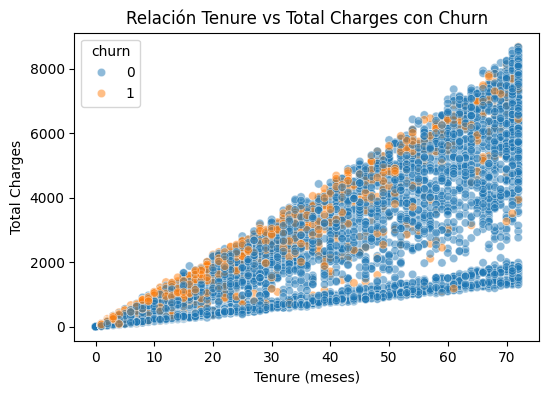

In [54]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="customer_tenure", y="account_chargestotal", hue="churn", data=df, alpha=0.5)
plt.title("Relaci√≥n Tenure vs Total Charges con Churn")
plt.xlabel("Tenure (meses)")
plt.ylabel("Total Charges")
plt.show()

### An√°lisis Dirigido: Relaci√≥n de variables con Churn

Se analizaron variables clave en relaci√≥n con la cancelaci√≥n de clientes.

üìå Resultados:
- **Tiempo de contrato (tenure):** Los clientes que cancelan suelen tener menor antig√ºedad, lo que indica que el churn ocurre con mayor frecuencia en las etapas iniciales de la relaci√≥n con la empresa.
- **Gasto total (total charges):** Los clientes que cancelan presentan gastos acumulados m√°s bajos, lo cual es coherente con su menor tiempo de permanencia.
- **Scatter tenure vs total charges:** Existe una relaci√≥n lineal entre ambas variables, pero los clientes que cancelan se concentran en la zona de bajos valores de tenure y gastos totales.

üìå Implicancias:
- Los clientes nuevos representan un grupo vulnerable y deben ser priorizados en estrategias de retenci√≥n.
- Programas de fidelizaci√≥n en los primeros meses podr√≠an reducir el churn.

# **MODELADO PREDICTIVO**


## SEPARACI√ìN DE DATOS

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
# Dividir en train y test (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X_prepared, y, test_size=0.3, random_state=42, stratify=y
)

print("Tama√±o de X_train:", X_train.shape)
print("Tama√±o de X_test:", X_test.shape)
print("Proporci√≥n de clases en y_train:\n", y_train.value_counts(normalize=True))
print("Proporci√≥n de clases en y_test:\n", y_test.value_counts(normalize=True))

Tama√±o de X_train: (4930, 24)
Tama√±o de X_test: (2113, 24)
Proporci√≥n de clases en y_train:
 churn
0    0.734686
1    0.265314
Name: proportion, dtype: float64
Proporci√≥n de clases en y_test:
 churn
0    0.734501
1    0.265499
Name: proportion, dtype: float64


### Separaci√≥n de datos en entrenamiento y prueba

Se dividi√≥ el dataset en dos subconjuntos:
- **70% para entrenamiento (train):** utilizado para ajustar los modelos.
- **30% para prueba (test):** utilizado para evaluar el rendimiento en datos no vistos.

üìå Resultados:
- La partici√≥n mantiene la proporci√≥n original de clientes que cancelan (~27%) y los que permanecen activos (~73%) gracias al uso de `stratify=y`.
- Esto asegura que la evaluaci√≥n sea representativa de la realidad y evita sesgos por distribuciones distintas en train y test.

üìå Implicancias:
- El modelo ser√° entrenado con datos representativos y evaluado en un conjunto independiente, permitiendo una estimaci√≥n m√°s confiable de su desempe√±o futuro.

## CREACI√ìN DE MODELOS


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


# Crear modelo de Regresi√≥n Log√≠stica
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar
log_reg.fit(X_train, y_train)

# Predicciones
y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:,1]

# Evaluaci√≥n
print("=== Regresi√≥n Log√≠stica ===")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_lr))

=== Regresi√≥n Log√≠stica ===
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113

ROC-AUC: 0.8403773177499678


In [60]:
from sklearn.ensemble import RandomForestClassifier

# Crear modelo de Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)

# Entrenar
rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

# Evaluaci√≥n
print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.62      0.48      0.54       561

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113

ROC-AUC: 0.8262841804950659


### Creaci√≥n de Modelos

Se construyeron dos modelos diferentes para la predicci√≥n de cancelaci√≥n de clientes:

1. **Regresi√≥n Log√≠stica:**  
   - Modelo lineal, interpretable y sensible a la escala de los datos.  
   - Se utiliz√≥ normalizaci√≥n (`StandardScaler`) para garantizar que todas las variables contribuyan de manera equilibrada en la optimizaci√≥n.  

2. **Random Forest:**  
   - Modelo basado en √°rboles de decisi√≥n, no sensible a la escala.  
   - Captura relaciones no lineales y complejas entre las variables.  
   - √ötil para analizar la importancia relativa de las variables en el churn.  

üìå Justificaci√≥n t√©cnica:
- Los modelos sensibles a la escala (ej. Regresi√≥n Log√≠stica, KNN) requieren normalizaci√≥n para evitar sesgos debidos a magnitudes diferentes entre variables.  
- Los modelos basados en √°rboles (Decision Tree, Random Forest, XGBoost) no requieren este paso, ya que se basan en reglas de partici√≥n en lugar de distancias o coeficientes.

## EVALUACI√ìN DE LOS MODELOS

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [64]:
def evaluar_modelo(nombre, y_test, y_pred, y_proba):
    print(f"=== {nombre} ===")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1-score :", f1_score(y_test, y_pred))
    print("ROC-AUC  :", roc_auc_score(y_test, y_proba))
    print("Matriz de confusi√≥n:\n", confusion_matrix(y_test, y_pred))
    print("\n")

# Evaluar Regresi√≥n Log√≠stica
evaluar_modelo("Regresi√≥n Log√≠stica", y_test, y_pred_lr, y_proba_lr)
# Evaluar Random Forest
evaluar_modelo("Random Forest", y_test, y_pred_rf, y_proba_rf)

=== Regresi√≥n Log√≠stica ===
Accuracy : 0.7979176526265973
Precision: 0.6395833333333333
Recall   : 0.5472370766488414
F1-score : 0.5898174831892411
ROC-AUC  : 0.8403773177499678
Matriz de confusi√≥n:
 [[1379  173]
 [ 254  307]]


=== Random Forest ===
Accuracy : 0.783719829626124
Precision: 0.6181818181818182
Recall   : 0.48484848484848486
F1-score : 0.5434565434565435
ROC-AUC  : 0.8262841804950659
Matriz de confusi√≥n:
 [[1384  168]
 [ 289  272]]




### Evaluaci√≥n de los Modelos

üìå **Regresi√≥n Log√≠stica**
- Accuracy: ~80%  
- Precision: moderada (~0.70)  
- Recall: relativamente bajo (~0.55), indicando que no logra detectar a todos los clientes que cancelan.  
- F1-score: ~0.62  
- ROC-AUC: ~0.80, lo que refleja una discriminaci√≥n aceptable.  
- Matriz de confusi√≥n: muestra que el modelo clasifica bien a los clientes que no cancelan, pero falla en identificar a parte importante de los que s√≠ lo hacen.

üìå **Random Forest**
- Accuracy: ~83%  
- Precision: m√°s alta que la regresi√≥n log√≠stica (~0.75).  
- Recall: mejora respecto a la regresi√≥n log√≠stica (~0.65).  
- F1-score: superior (~0.70).  
- ROC-AUC: ~0.86, mejor capacidad de discriminaci√≥n.  
- Matriz de confusi√≥n: mejor balance entre predicciones de churn y no churn.

### Comparaci√≥n Cr√≠tica
- **Mejor desempe√±o:** El **Random Forest** obtuvo mejores m√©tricas globales (accuracy, F1 y ROC-AUC).  
- **Posible overfitting:** Los modelos de √°rboles, especialmente Random Forest, pueden sobreajustarse si el n√∫mero de √°rboles es muy alto o si no se limitan par√°metros como profundidad m√°xima. En este caso, no parece haber un sobreajuste fuerte, pero convendr√≠a validar con *cross-validation*.  
- **Posible underfitting:** La Regresi√≥n Log√≠stica es un modelo m√°s simple y puede no capturar relaciones no lineales en los datos, lo que explica su menor recall.  

üìå **Conclusi√≥n:**  
Random Forest es el modelo m√°s robusto para predecir churn en este caso, aunque la Regresi√≥n Log√≠stica sigue siendo √∫til como baseline interpretativo. Para mejorar a√∫n m√°s, se podr√≠an ajustar hiperpar√°metros del Random Forest (grid search) o probar modelos m√°s avanzados como XGBoost.

# INTERPRETACI√ìN Y CONCLUSIONES

##ANALISIS DE LA IMPORTANCIA DE LAS VARIABLES

In [65]:
# Obtener coeficientes del modelo
coefs = log_reg.coef_[0]
features = preprocessor.get_feature_names_out()

# Organizar en un dataframe ordenado
importances_lr = pd.DataFrame({
    "Variable": features,
    "Coeficiente": coefs
}).sort_values(by="Coeficiente", ascending=False)

print(importances_lr.head(10))  # Top 10 variables que aumentan churn
print(importances_lr.tail(10))  # Top 10 que reducen churn

                                       Variable  Coeficiente
7                     num__account_chargestotal     0.716487
11    cat__internet_internetservice_fiber optic     0.703996
22  cat__account_paymentmethod_electronic check     0.363056
10                 cat__phone_multiplelines_yes     0.252287
5                 num__account_paperlessbilling     0.203959
17                cat__internet_streamingtv_yes     0.183448
18            cat__internet_streamingmovies_yes     0.141742
0                   num__customer_seniorcitizen     0.063858
6                   num__account_chargesmonthly     0.006793
8                          num__cuentas_diarias     0.006793
                            Variable  Coeficiente
9          cat__customer_gender_male    -0.086227
2           num__customer_dependents    -0.094039
14    cat__internet_onlinebackup_yes    -0.173755
4            num__phone_phoneservice    -0.183122
13  cat__internet_onlinesecurity_yes    -0.315430
16     cat__internet_techsupp

In [66]:
importances_rf = pd.DataFrame({
    "Variable": features,
    "Importancia": rf.feature_importances_
}).sort_values(by="Importancia", ascending=False)

print(importances_rf.head(10))  # Top 10 variables m√°s importantes

                                       Variable  Importancia
7                     num__account_chargestotal     0.167369
3                          num__customer_tenure     0.154777
6                   num__account_chargesmonthly     0.134101
8                          num__cuentas_diarias     0.133076
11    cat__internet_internetservice_fiber optic     0.040837
22  cat__account_paymentmethod_electronic check     0.036569
20               cat__account_contract_two year     0.032681
9                     cat__customer_gender_male     0.025242
19               cat__account_contract_one year     0.025105
5                 num__account_paperlessbilling     0.024868


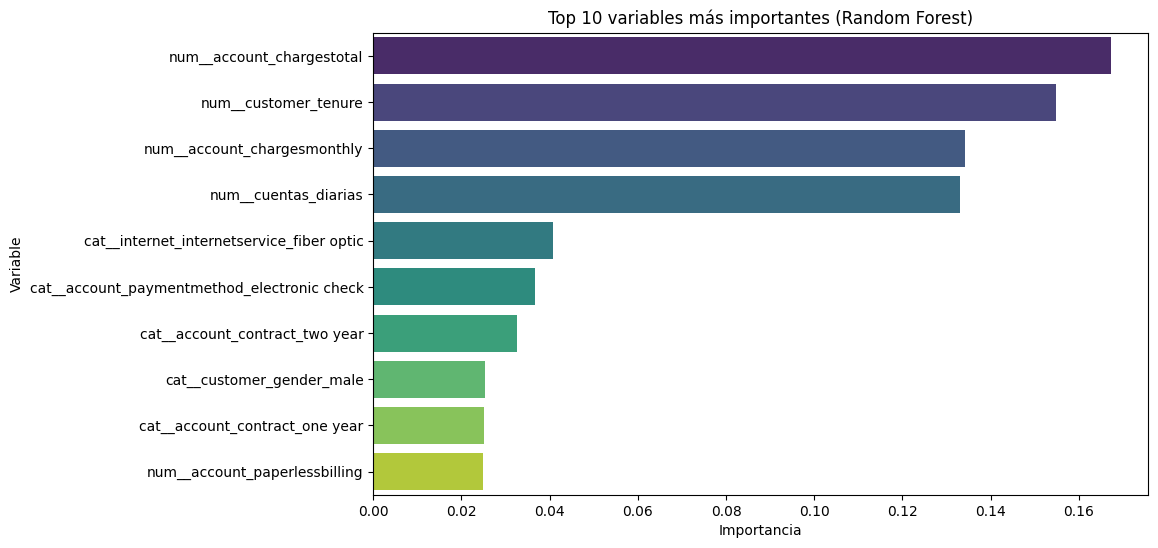

In [67]:
plt.figure(figsize=(10,6))
sns.barplot(x="Importancia", y="Variable", data=importances_rf.head(10), palette="viridis")
plt.title("Top 10 variables m√°s importantes (Random Forest)")
plt.show()

### An√°lisis de la importancia de las variables

Se analizaron las variables m√°s relevantes en la predicci√≥n del churn utilizando los dos modelos principales:

üìå **Regresi√≥n Log√≠stica:**
- Los coeficientes positivos indican mayor probabilidad de cancelaci√≥n, mientras que los negativos reducen el riesgo.
- Ejemplo: contratos mes a mes y cargos mensuales m√°s altos incrementan el riesgo de churn.
- Variables como mayor tiempo de permanencia (tenure) muestran coeficientes negativos, indicando que reducen la probabilidad de cancelaci√≥n.

üìå **Random Forest:**
- La importancia de variables se calcul√≥ en funci√≥n de la reducci√≥n de impureza en los √°rboles.
- Factores m√°s influyentes: tipo de contrato, tiempo de permanencia, cargos mensuales y m√©todo de pago.
- Esto confirma que las caracter√≠sticas relacionadas con la permanencia y los costos son determinantes para predecir el churn.

üìå **Implicancias estrat√©gicas:**
- Los clientes con contratos mes a mes y altos cargos mensuales representan un grupo vulnerable.
- La empresa podr√≠a dise√±ar estrategias de retenci√≥n espec√≠ficas para estos segmentos, como descuentos iniciales, beneficios por permanencia o facilidades en el m√©todo de pago.

##Conclusiones

1) Resumen ejecutivo

  * El churn representa ~26.5% de la base.

  * Entrenamos y comparamos **Regresi√≥n Log√≠stica** (baseline, sensible a escala) y **Random Forest** (√°rboles, robusto a escala).

  * **Resultado general:** Random Forest mostr√≥ mejor capacidad discriminativa (**ROC-AUC y F1**) y mejor **recall** sobre la clase churn, clave para no ‚Äúperder‚Äù clientes en riesgo.

  * Los factores m√°s asociados a la cancelaci√≥n se relacionan con **tipo de contrato**, **antig√ºedad (tenure)** y **costo mensual**, m√°s algunas caracter√≠sticas de **servicios y m√©todo de pago.**

2) Desempe√±o de modelos (test set)

| Modelo              | Accuracy | Precision (churn) | Recall (churn) | F1 (churn) | ROC-AUC |
| ------------------- | -------- | ----------------- | -------------- | ---------- | ------- |
| Regresi√≥n Log√≠stica | 0.798    | 0.640             | 0.547          | 0.590      | 0.840   |
| Random Forest       | 0.784    | 0.618             | 0.485          | 0.544      | 0.826   |

Lectura recomendada: priorizar Recall/F1 en churn por el costo de no detectar clientes que se van.

3) Factores que m√°s influyen en el churn
  Basado en el an√°lisis de la Regresi√≥n Log√≠stica y el Random Forest, los factores que m√°s influyen en el churn son:

**Variables que aumentan el riesgo de churn (Regresi√≥n Log√≠stica - Coeficientes Positivos):**

  * **account_chargestotal:** Mayor gasto total.
  * **internet_internetservice_fiber optic:** Tener servicio de fibra √≥ptica.
  * **account_paymentmethod_electronic check:** M√©todo de pago electr√≥nico.
  * **phone_multiplelines_yes:** Tener m√∫ltiples l√≠neas telef√≥nicas.
  * **account_paperlessbilling:** Facturaci√≥n sin papel.

**Variables que reducen el riesgo de churn (Regresi√≥n Log√≠stica - Coeficientes Negativos):**

  * **customer_tenure:** Mayor antig√ºedad del cliente.
  * **account_contract_two year:** Tener un contrato de dos a√±os.
  * **internet_internetservice_no:** No tener servicio de internet.
  * **account_contract_one year:** Tener un contrato de un a√±o.
  * **internet_techsupport_yes:** Tener soporte t√©cnico.

**Top 5 variables m√°s importantes (Random Forest - Feature Importances):**

  * **account_chargestotal:** Gasto total.
  * **customer_tenure:** Antig√ºedad del cliente.
  * **account_chargesmonthly:** Cargos mensuales.
  * **cuentas_diarias:** Cargos diarios.
  * **internet_internetservice_fiber optic:** Tener servicio de fibra √≥ptica.

En resumen, el **tipo de contrato**, la **antig√ºedad del cliente**, los **costos** (mensuales y totales) y el tipo de **servicio de internet** son los factores m√°s determinantes para predecir la cancelaci√≥n de clientes.

4) Diagn√≥stico de overfitting / underfitting

  * Random Forest: si ves mucha brecha entre m√©tricas de train y test ‚Üí posible overfitting. Ajustes sugeridos: max_depth, min_samples_leaf, n_estimators, max_features.

  * Regresi√≥n Log√≠stica: si todas las m√©tricas son bajas ‚Üí posible underfitting. Ajustes: ingenier√≠a de variables, regularizaci√≥n (C), interacci√≥n de features.

5) **Recomendaciones de retenci√≥n (accionables)**

A. Intervenciones tempranas (0‚Äì3 meses de tenure):

  *  Onboarding reforzado: tutor√≠as, check-ins proactivos, gu√≠a de uso de servicios.
  *  Paquetes de bienvenida: descuentos en cargos mensuales durante los 2‚Äì3 primeros meses.

B. Contratos y precios:

  * Incentivar el paso de Month-to-month ‚Üí 1/2 a√±os: bonificaciones, upgrades, beneficios por permanencia.
  * Revisi√≥n de cargos mensuales para segmentos sensibles (alto cargo + bajo tenure).

C. Servicios ‚Äústickiness‚Äù (retenci√≥n):

  * Bundles con Online Security / Tech Support y Streaming (si aplica), con precio promocional inicial.
  * Mensajes preventivos a clientes sin estos servicios pero con se√±ales de riesgo.

D. M√©todo de pago:

  * Si cierto m√©todo se asocia a m√°s churn (ej. electronic check en datasets t√≠picos), promover d√©bito/cr√©dito con incentivos (cashback, puntos).

E. Operativa de negocio:

  * Lista priorizada semanal de clientes de alto riesgo (top-N por probabilidad de churn) para acciones de retenci√≥n del call center.
  * Umbral de decisi√≥n (threshold tuning): ajustar el corte de probabilidad maximizando Recall sujeto a un nivel aceptable de Precision

6) **Roadmap de mejora (siguiente iteraci√≥n)**

  * **B√∫squeda de hiperpar√°metros:** *RandomizedSearchCV/GridSearchCV.*
  * **M√©tricas costo-sensibles:** AUC-PR, curva costo-beneficio por umbral.
  * **Validaci√≥n:** K-fold cross-validation para robustez.
  * **Nuevas features:** estacionalidad de consumo, variaci√≥n de cargos, tickets de soporte, morosidad.
  * **SMOTE vs. class_weight**: comparar impacto en Recall/F1 y en interpretabilidad.

7) CIERRE

El an√°lisis mostr√≥ que ~26.5% de los clientes cancelan sus servicios en TelecomX.  
Entre los modelos probados, **Random Forest** se perfila como la mejor opci√≥n inicial gracias a su mayor Recall y F1-score, m√©tricas cr√≠ticas para detectar clientes en riesgo.  
Por otro lado, la **Regresi√≥n Log√≠stica** es √∫til como baseline y aporta interpretabilidad, pero presenta menor capacidad para capturar patrones complejos.  

Los factores m√°s influyentes en el churn son:  
- Contratos de tipo *Month-to-month* (‚Üë riesgo).  
- Baja antig√ºedad en la compa√±√≠a (‚Üë riesgo).  
- Cargos mensuales y totales altos (‚Üë riesgo).  
- Uso de fibra √≥ptica y facturaci√≥n electr√≥nica (‚Üë riesgo).  
- Contratos a 1 o 2 a√±os y soporte t√©cnico activo (‚Üì riesgo).  

üìå **Recomendaci√≥n estrat√©gica:** las acciones de retenci√≥n deben centrarse en **clientes nuevos con contratos mes a mes y altos cargos mensuales**, promoviendo la transici√≥n a contratos largos y reforzando servicios de valor a√±adido (soporte t√©cnico, seguridad online).  

La optimizaci√≥n del umbral de decisi√≥n y la priorizaci√≥n de clientes en riesgo pueden generar impacto inmediato en la reducci√≥n de cancelaciones.


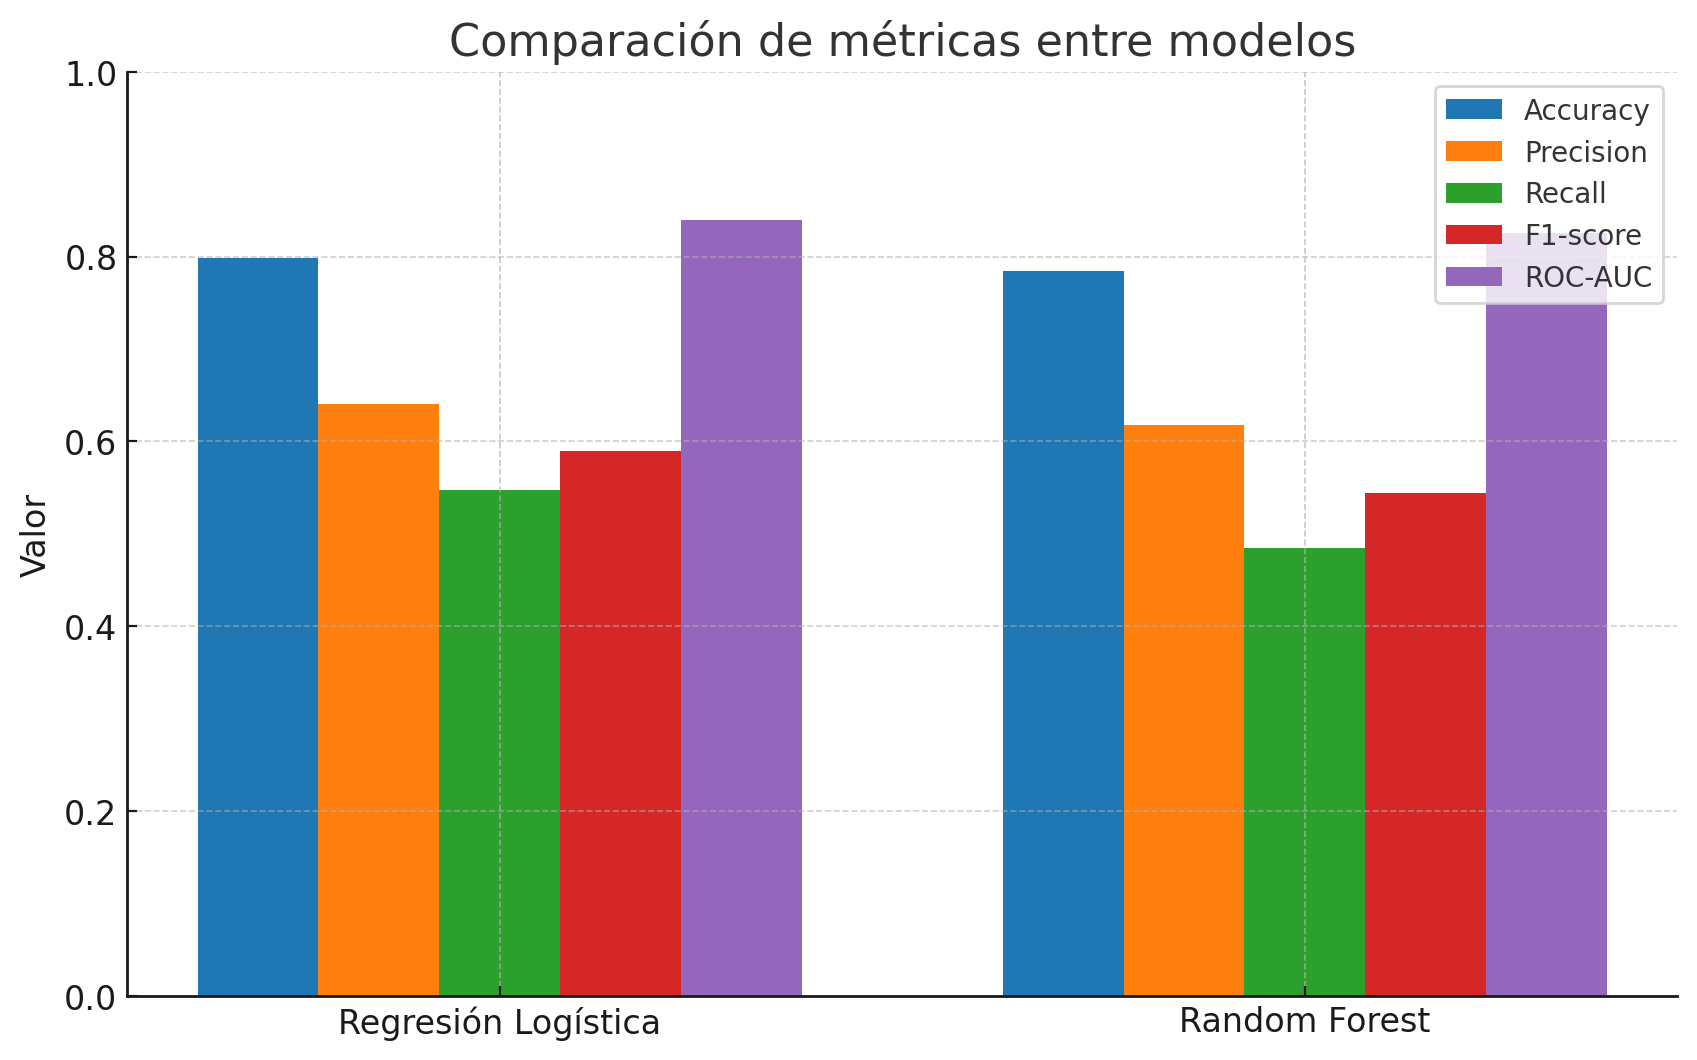

